# This script processes the o2and3 results of the maxNumber study without and with memoization

1. Compile o2and3maxnum (first using stage1tbb and later with memoization using stage1tbbrem) with:
```
make bin/o2and3maxnum
```
2. Run the benchmarking script
```
cd scripts
python3 run_o2and3_maxnumber
```
3. The output that we will process is o2and3_maxnum_coffee.txt (renamed from o2and3maxnum.out)

# First WITHOUT memoization

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename):
    experiment ={}

    with open(filename) as f:
        for line in f:
            tokens = line.split()
            if "Running:" in tokens:
                name=tokens[2].split("/")[3]
                nth=int(tokens[6])
                maxNum = int(tokens[9])
                if name not in experiment:
                    experiment[name]={}
                if maxNum not in experiment[name]:
                    experiment[name][maxNum]={}
            if 'Quadtree' in tokens:
                experiment[name][maxNum][nth]=[float(tokens[5])]
            if "STAGE" in tokens:
                experiment[name][maxNum][nth].append(float(tokens[5]))
            if 'Average:' in tokens:
                experiment[name][maxNum][nth].append(float(tokens[1]))

    #print(experiment)

    results = {}

    for i in experiment:
        results[i]={} #LiDAR cloud name
        for j in experiment[i]:
            results[i][j]={} #minRad
            for k in experiment[i][j]:
                results[i][j][k]={} #nth
                results[i][j][k]['qtree']=experiment[i][j][k][0]
                results[i][j][k]['stage1']=mean(experiment[i][j][k][1:16:3])
                results[i][j][k]['stage2']=mean(experiment[i][j][k][2:16:3])
                results[i][j][k]['stage3']=mean(experiment[i][j][k][3:16:3])
                results[i][j][k]['owm']=experiment[i][j][k][16]
    return results

res1=tokenize("o2and3_maxnum_norem_coffee.txt")

#print(results)



In [16]:
for i in res1:
    times=[res1[i][j][1]['owm'] for j in res1[i]]
    mintime=min(times)
    maxNum=np.argmin(times)
    print("Cloud {} with baseline maxNumber {:.1f} has sequential OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][32][1]['owm'] ))
    print("Cloud {} with best maxNumber {:.1f} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[maxNum],mintime ,res1[i][32][1]['owm']/mintime))


Cloud AlcoyH with baseline maxNumber 32.0 has sequential OWM time = 5.66
Cloud AlcoyH with best maxNumber 512.0 has sequential OWM best time (speedup) = 4.99 (1.13x)
Cloud ArzuaH with baseline maxNumber 32.0 has sequential OWM time = 4.99
Cloud ArzuaH with best maxNumber 512.0 has sequential OWM best time (speedup) = 4.29 (1.16x)
Cloud BrionFH with baseline maxNumber 32.0 has sequential OWM time = 4.56
Cloud BrionFH with best maxNumber 256.0 has sequential OWM best time (speedup) = 4.07 (1.12x)
Cloud BrionUH with baseline maxNumber 32.0 has sequential OWM time = 5.09
Cloud BrionUH with best maxNumber 256.0 has sequential OWM best time (speedup) = 4.75 (1.07x)


In [3]:
for i in res1:
    times=[res1[i][j][8]['owm'] for j in res1[i]]
    mintime=min(times)
    maxNum=np.argmin(times)
    print("Cloud {} with baseline maxNumber {:.1f} has 8-core OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][32][8]['owm'] ))
    print("Cloud {} with best maxNumber {:.1f} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[maxNum],mintime ,res1[i][32][8]['owm']/mintime))

    

Cloud AlcoyH with baseline maxNumber 32.0 has 8-core OWM time = 1.05
Cloud AlcoyH with best maxNumber 512.0 has 8-core OWM best time (speedup) = 0.92 (1.15x)
Cloud ArzuaH with baseline maxNumber 32.0 has 8-core OWM time = 0.94
Cloud ArzuaH with best maxNumber 512.0 has 8-core OWM best time (speedup) = 0.81 (1.16x)
Cloud BrionFH with baseline maxNumber 32.0 has 8-core OWM time = 2.48
Cloud BrionFH with best maxNumber 128.0 has 8-core OWM best time (speedup) = 2.44 (1.02x)
Cloud BrionUH with baseline maxNumber 32.0 has 8-core OWM time = 2.87
Cloud BrionUH with best maxNumber 64.0 has 8-core OWM best time (speedup) = 2.86 (1.01x)


In [4]:
for i in res1:
    times=[res1[i][j][1]['qtree'] for j in res1[i]]
    mintime=min(times)
    maxNum=np.argmin(times)
    print("Cloud {} with maxNumber {:.1f} has qtree creation best time = {:.2f}".format(i,list(res1[i].keys())[maxNum],mintime ))


Cloud AlcoyH with maxNumber 65536.0 has qtree creation best time = 1.73
Cloud ArzuaH with maxNumber 65536.0 has qtree creation best time = 2.08
Cloud BrionFH with maxNumber 32768.0 has qtree creation best time = 2.19
Cloud BrionUH with maxNumber 32768.0 has qtree creation best time = 2.69


In [5]:
for i in res1:
    times=[res1[i][j][1]['qtree']+res1[i][j][8]['owm'] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    maxNum=np.argmin(times)
    baselinetotaltime=res1[i][32][1]['qtree']+res1[i][32][8]['owm']
    print("Cloud {} with baseline maxNumber {:.1f} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res1[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best maxNumber {:.1f} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[maxNum],mintime ,baselinetotaltime/mintime))


Cloud AlcoyH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 3.47
Cloud AlcoyH with best maxNumber 2048.0 has total (8-core owm + qtree creation) best time (speedup) = 2.82 (1.23x)
Cloud ArzuaH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 4.25
Cloud ArzuaH with best maxNumber 8192.0 has total (8-core owm + qtree creation) best time (speedup) = 3.27 (1.30x)
Cloud BrionFH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 6.49
Cloud BrionFH with best maxNumber 256.0 has total (8-core owm + qtree creation) best time (speedup) = 5.73 (1.13x)
Cloud BrionUH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 7.35
Cloud BrionUH with best maxNumber 512.0 has total (8-core owm + qtree creation) best time (speedup) = 6.60 (1.11x)


# Execution time for each cloud with tfm/parallelcpp version depending on maxNumber

In [ ]:
import matplotlib.pyplot as plt
def plot_cloudtime(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()
    xticks=range(1,len(x)+1)

    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth]['qtree']+results[cloudname][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Tree Const.','OWM+Tree C.']
    if nth==1:
        plt.title(cloudname[:-1]+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname[:-1]+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MaxNumber', fontsize=xlabelfs)

    plt.xticks(ticks=xticks[::2], labels=x[::2], fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudtime('AlcoyH',1,res1)
plot_cloudtime('AlcoyH',8,res1)
plot_cloudtime('ArzuaH',1,res1)
plot_cloudtime('ArzuaH',8,res1)
plot_cloudtime('BrionFH',1,res1)
plot_cloudtime('BrionFH',8,res1)
plot_cloudtime('BrionUH',1,res1)
plot_cloudtime('BrionUH',8,res1)

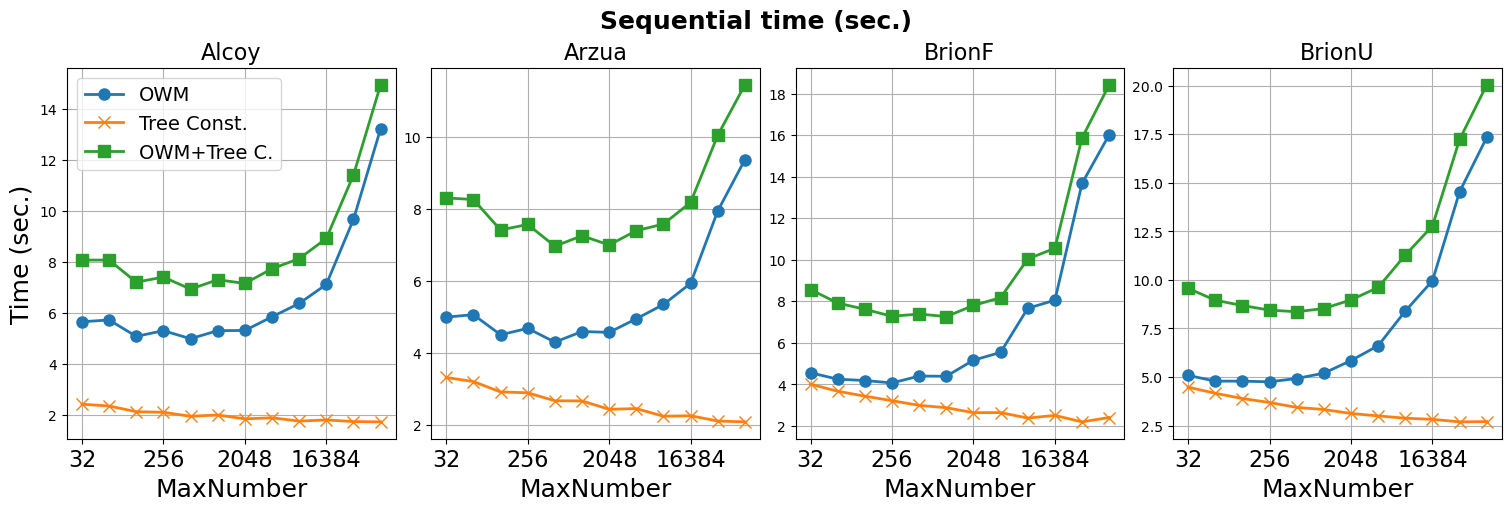

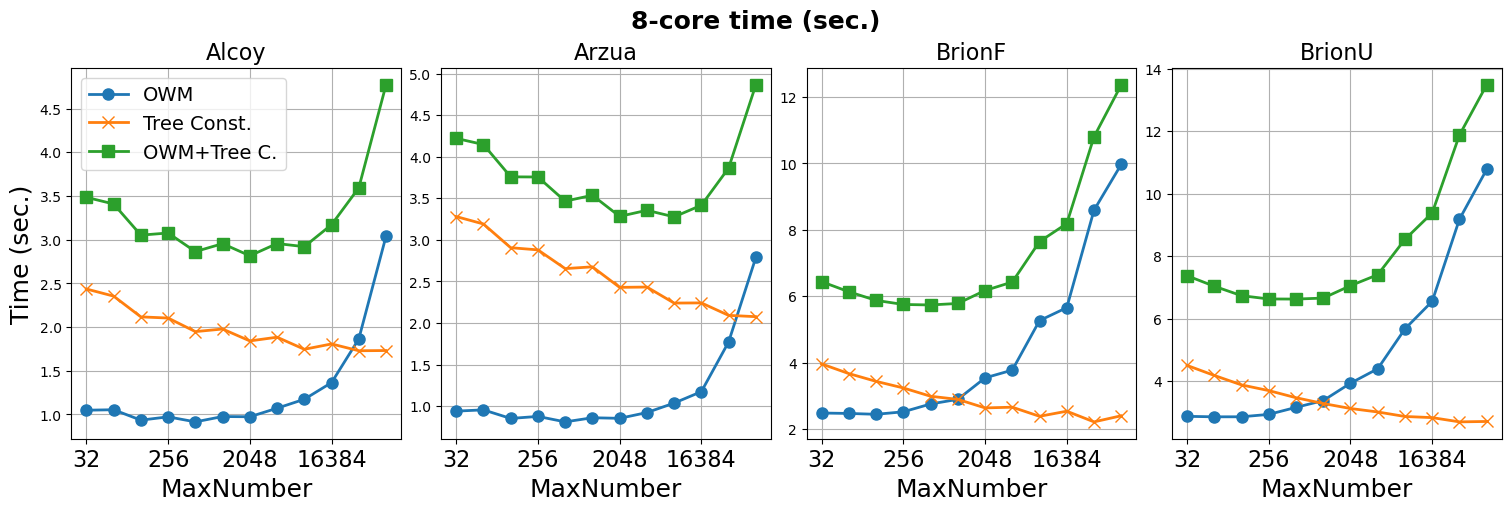

In [19]:
def plot_alltimes(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Tree Const.','OWM+Tree C.']
    x=list(results['AlcoyH'].keys())
    xticks=range(1,len(x)+1)
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True, sharey=False)
    for i,name in zip(range(4),['AlcoyH','ArzuaH','BrionFH','BrionUH']):
        axs[i].plot(np.array(xticks), np.array([results[name][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(xticks), np.array([results[name][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(xticks), np.array([results[name][i][nth]['qtree']+results[name][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name[:-1],fontsize=16)
        axs[i].set_xlabel('MaxNumber', fontsize=xlabelfs)
        axs[i].set_xticks(ticks=xticks[::3], labels=x[::3],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    if nth==1:
        pp = PdfPages("MaxNumSeq.pdf")
    else:
        pp = PdfPages("MaxNum8cores.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()

plot_alltimes(1,res1)
plot_alltimes(8,res1)

In [10]:
output="All_Optimizations.out"

f = open(output, "a")

for i in res1:
    times=[res1[i][j][1]['qtree']+res1[i][j][1]['owm'] for j in res1[i]] #1-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Opt2-MaxNumber; {}; {:.2f}; {:.2f};".format(i[:-1],res1[i][list(res1[i].keys())[minRad]][1]['qtree'],res1[i][list(res1[i].keys())[minRad]][1]['owm']))
    f.write("Opt2-MaxNumber; {}; {:.2f}; {:.2f};\n".format(i[:-1],res1[i][list(res1[i].keys())[minRad]][1]['qtree'],res1[i][list(res1[i].keys())[minRad]][1]['owm']))

f.close()

Opt2-MaxNumber; Alcoy; 1.95; 4.99;
Opt2-MaxNumber; Arzua; 2.66; 4.29;
Opt2-MaxNumber; BrionF; 2.88; 4.39;
Opt2-MaxNumber; BrionU; 3.44; 4.92;



# Now WITH memoization

In [11]:
res2=tokenize("o2and3_maxnum_coffee.txt")

In [12]:
for i in res2:
    times=[res2[i][j][1]['owm'] for j in res2[i]]
    mintime=min(times)
    maxNum=np.argmin(times)
    print("Cloud {} with baseline maxNumber {:.1f} has sequential OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][32][1]['owm'] ))
    print("Cloud {} with best maxNumber {:.1f} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[maxNum],mintime ,res2[i][32][1]['owm']/mintime))


Cloud AlcoyH with baseline maxNumber 32.0 has sequential OWM time = 4.05
Cloud AlcoyH with best maxNumber 512.0 has sequential OWM best time (speedup) = 3.56 (1.14x)
Cloud ArzuaH with baseline maxNumber 32.0 has sequential OWM time = 3.12
Cloud ArzuaH with best maxNumber 512.0 has sequential OWM best time (speedup) = 2.81 (1.11x)
Cloud BrionFH with baseline maxNumber 32.0 has sequential OWM time = 2.12
Cloud BrionFH with best maxNumber 256.0 has sequential OWM best time (speedup) = 2.04 (1.04x)
Cloud BrionUH with baseline maxNumber 32.0 has sequential OWM time = 2.42
Cloud BrionUH with best maxNumber 256.0 has sequential OWM best time (speedup) = 2.29 (1.06x)


In [9]:
for i in res2:
    times=[res2[i][j][8]['owm'] for j in res2[i]]
    mintime=min(times)
    maxNum=np.argmin(times)
    print("Cloud {} with baseline maxNumber {:.1f} has 8-core OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][32][8]['owm'] ))
    print("Cloud {} with best maxNumber {:.1f} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[maxNum],mintime ,res2[i][32][8]['owm']/mintime))

    

Cloud AlcoyH with baseline maxNumber 32.0 has 8-core OWM time = 0.77
Cloud AlcoyH with best maxNumber 512.0 has 8-core OWM best time (speedup) = 0.68 (1.13x)
Cloud ArzuaH with baseline maxNumber 32.0 has 8-core OWM time = 0.63
Cloud ArzuaH with best maxNumber 512.0 has 8-core OWM best time (speedup) = 0.55 (1.14x)
Cloud BrionFH with baseline maxNumber 32.0 has 8-core OWM time = 1.35
Cloud BrionFH with best maxNumber 128.0 has 8-core OWM best time (speedup) = 1.34 (1.01x)
Cloud BrionUH with baseline maxNumber 32.0 has 8-core OWM time = 1.56
Cloud BrionUH with best maxNumber 64.0 has 8-core OWM best time (speedup) = 1.55 (1.01x)


In [10]:
for i in res2:
    times=[res2[i][j][1]['qtree'] for j in res2[i]]
    mintime=min(times)
    maxNum=np.argmin(times)
    print("Cloud {} with maxNumber {:.1f} has qtree creation best time = {:.2f}".format(i,list(res2[i].keys())[maxNum],mintime ))


Cloud AlcoyH with maxNumber 65536.0 has qtree creation best time = 1.72
Cloud ArzuaH with maxNumber 65536.0 has qtree creation best time = 2.08
Cloud BrionFH with maxNumber 32768.0 has qtree creation best time = 2.18
Cloud BrionUH with maxNumber 32768.0 has qtree creation best time = 2.66


In [11]:
for i in res2:
    times=[res2[i][j][1]['qtree']+res2[i][j][8]['owm'] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    maxNum=np.argmin(times)
    baselinetotaltime=res2[i][32][1]['qtree']+res2[i][32][8]['owm']
    print("Cloud {} with baseline maxNumber {:.1f} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res2[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best maxNumber {:.1f} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[maxNum],mintime ,baselinetotaltime/mintime))


Cloud AlcoyH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 3.19
Cloud AlcoyH with best maxNumber 2048.0 has total (8-core owm + qtree creation) best time (speedup) = 2.57 (1.24x)
Cloud ArzuaH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 3.94
Cloud ArzuaH with best maxNumber 8192.0 has total (8-core owm + qtree creation) best time (speedup) = 2.98 (1.32x)
Cloud BrionFH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 5.30
Cloud BrionFH with best maxNumber 1024.0 has total (8-core owm + qtree creation) best time (speedup) = 4.46 (1.19x)
Cloud BrionUH with baseline maxNumber 32.0 has total (8-core owm + qtree creation) time = 6.05
Cloud BrionUH with best maxNumber 1024.0 has total (8-core owm + qtree creation) best time (speedup) = 5.07 (1.19x)


# Execution time for each cloud with tfm/parallelcpp version depending on maxNumber

In [ ]:
plot_cloudtime('AlcoyH',1,res2)
plot_cloudtime('AlcoyH',8,res2)
plot_cloudtime('ArzuaH',1,res2)
plot_cloudtime('ArzuaH',8,res2)
plot_cloudtime('BrionFH',1,res2)
plot_cloudtime('BrionFH',8,res2)
plot_cloudtime('BrionUH',1,res2)
plot_cloudtime('BrionUH',8,res2)

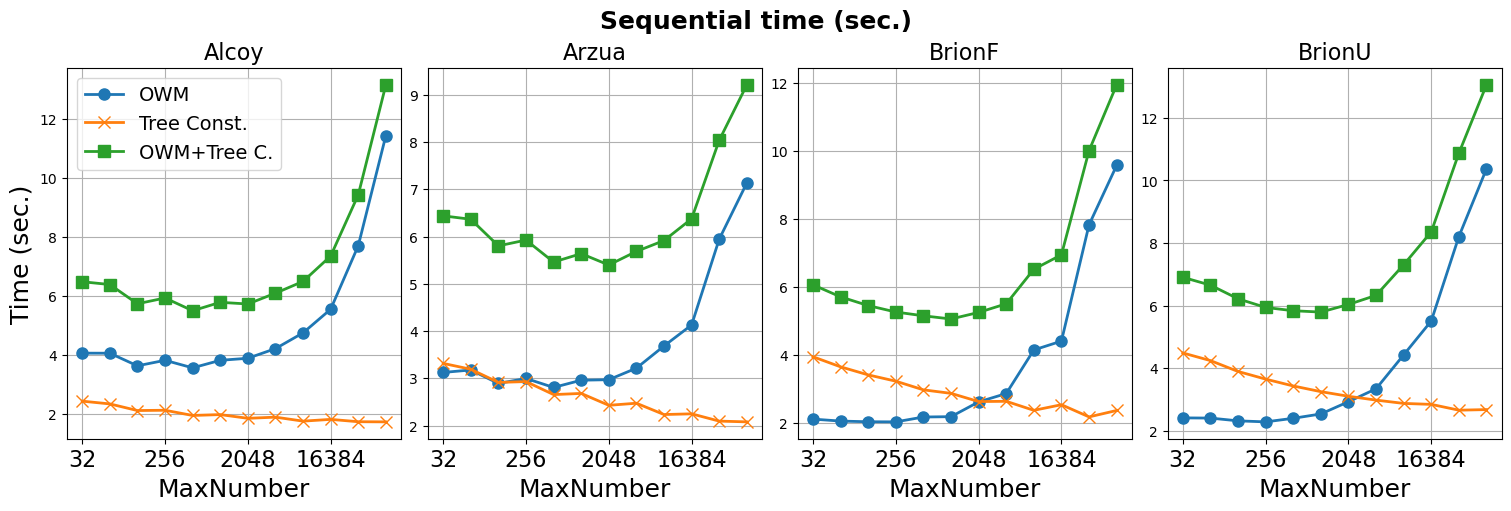

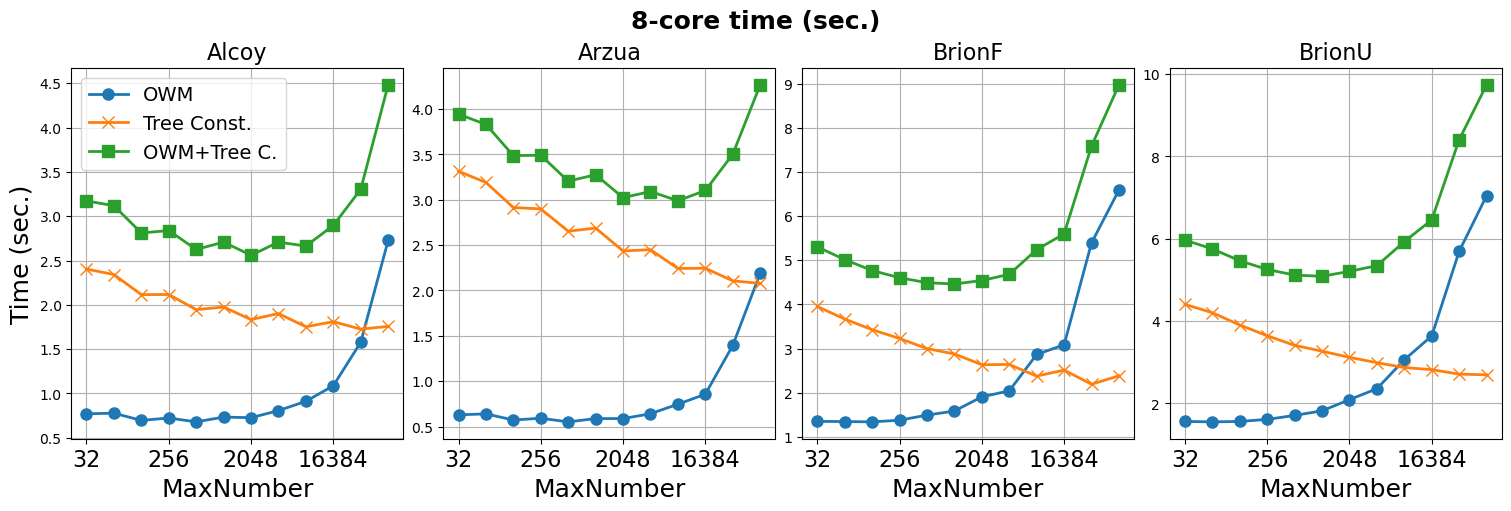

In [18]:
plot_alltimes(1,res2)
plot_alltimes(8,res2)